In [59]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

with open("ticker_data_augmented.pkl", "rb") as file:
    loaded_data = pickle.load(file)

In [60]:
loaded_data['HSY']

,Adj Close,Close,High,Low,Open,Volume,Last_Dividend,Return,Log_Return,Rolling Std_252,Annualized Vol,Market_Cap,EPS,Book_Value,Debt_Ratio
Date,,,,,,,,,,,,,,,
2020-01-02,129.189026,143.960007,147.809998,143.539993,147.229996,821500,0.773,NaN,NaN,NaN,NaN,1.908652e+10,1.28,1.739222e+09,0.785638
2020-01-03,130.355667,145.259995,145.889999,143.759995,143.970001,770900,0.773,0.009030,0.008990,NaN,NaN,1.925888e+10,1.28,1.739222e+09,0.785638
2020-01-06,129.736435,144.570007,145.279999,143.649994,145.270004,1032900,0.773,-0.004750,-0.004762,NaN,NaN,1.916739e+10,1.28,1.739222e+09,0.785638
2020-01-07,129.987701,144.850006,145.520004,143.979996,144.199997,858800,0.773,0.001937,0.001935,NaN,NaN,1.920451e+10,1.28,1.739222e+09,0.785638
2020-01-08,131.055573,146.039993,146.929993,144.860001,145.479996,865200,0.773,0.008215,0.008182,NaN,NaN,1.936228e+10,1.28,1.739222e+09,0.785638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,174.809998,174.809998,176.410004,173.000000,175.940002,1458400,1.370,-0.000800,-0.000801,0.013198,0.209518,2.582660e+10,2.34,4.204969e+09,0.666838
2024-11-25,175.539993,175.539993,177.380005,175.270004,175.500000,2088200,1.370,0.004176,0.004167,0.013201,0.209562,2.593445e+10,2.34,4.204969e+09,0.666838
2024-11-26,173.289993,173.289993,175.559998,172.289993,175.210007,1307500,1.370,-0.012818,-0.012900,0.013182,0.209257,2.560204e+10,2.34,4.204969e+09,0.666838


In [61]:
p = pd.read_excel('Portfolios.xlsx', index_col = 0)
portfolios = pd.DataFrame(index = p.index)
portfolios['Low Risk'] = p['low'].apply(ast.literal_eval)
portfolios['Moderate Risk'] = p['moderate'].apply(ast.literal_eval)
portfolios['High Risk'] = p['high'].apply(ast.literal_eval)
portfolios['Very High Risk'] = p['very_high'].apply(ast.literal_eval)

In [62]:
portfolio_categories = ['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk']
# Pre-filter portfolios to remove stocks without data starting from 2020
for category in portfolio_categories:
    for date in portfolios.index:
        # Filter valid stocks that have data starting from or before 2020-01-01
        valid_stocks = [
            stock for stock in portfolios.loc[date, category]
            if stock in loaded_data and loaded_data[stock].index.min() <= pd.Timestamp("2021-12-31")
        ]
        
        # Assign the filtered list back to the portfolio DataFrame
        portfolios.at[date, category] = valid_stocks

portfolios

,Low Risk,Moderate Risk,High Risk,Very High Risk
Date,,,,
2021-12-31,"[HSY, MMC, PG, ICE, MCD, WM, JNJ, SHW, CL, PEP...","[MCK, ISRG, TYL, EW, CRM, NVDA, WST, FI, IDXX,...","[ACGL, AFL, BK, BWA, C, CI, CNC, CNP, CVX, DOW...","[ABNB, AIG, ALB, ALGN, AMAT, AMD, APA, APTV, A..."
2022-03-31,"[PGR, WMT, AEE, BMY, O, CNP, JNJ, HSY, ATO, CM...","[EW, MSI, MNST, WELL, VRTX, FDS, STE, JKHY, A,...","[AIG, BK, COF, DD, DOW, EMN, FDX, FI, FIS, FIT...","[APA, BKR, CF, COP, CTRA, DLTR, DVN, EOG, EQT,..."
2022-06-30,"[L, MCK, PGR, AME, JNJ, RSG, AIZ, CB, UNH, STZ...","[ORLY, VRSK, MNST, VRTX, REGN, TDY, JKHY, BSX,...","[ADI, AIG, BK, CAH, CBRE, CE, CNC, COF, COP, D...","[EPAM, LW, OXY, SMCI, TPL, VLO]"
2022-09-30,"[HSY, RSG, WM, VRSK, MCK, V, AME, MCD, AJG, ST...","[MNST, VRTX, REGN, TDY, BSX, STE, FTV, DHR, RO...","[AIG, BEN, BIIB, BWA, CE, CFG, CNC, COF, COP, ...","[CF, CTRA, EOG, EQT, FANG, FICO, HES, LVS, MOS..."
2022-12-30,"[L, JNJ, PG, GL, MCD, SJM, CL, CHD, MDLZ, COR,...","[INCY, MSI, CTVA, FI, MNST, VRTX, J, BSX, TDY,...","[ADI, AIG, BEN, BLK, BWA, CE, CFG, CNC, COO, C...","[AXON, BIIB, FSLR]"
2023-03-31,"[BSX, V, MA, YUM, ROP, MCK, WMT, AON, KDP, PEP...","[MNST, INCY, VRTX, TDY, SPGI, RMD, HOLX, ROL, ...","[ADI, BEN, BLK, BWA, BXP, CFG, COO, COP, CTSH,...","[ANET, ANSS, APTV, AXON, BA, BALL, BIIB, BKR, ..."
2023-06-30,"[WMT, LW, COR, WM, MCD, RSG, ROP, MNST, AAPL, ...","[INCY, VRTX, GOOG, ROL, RMD, VMC, CPRT, SPGI, ...","[ADI, AIG, AIZ, ALL, BA, BEN, BWA, C, CFG, COO...","[ABNB, ALB, ALGN, AMAT, AMD, BALL, BBY, BIIB, ..."
2023-09-29,"[L, ROP, MA, MMC, AME, WMT, COST, V, GL, CHD, ...","[MAR, VRTX, SPGI, DHR, PTC, J, TDY, FTV, ROL, ...","[AIG, AIZ, ALL, BA, BEN, BWA, CNC, COO, COP, C...","[ABNB, ADSK, ANET, APA, AXON, BKR, BX, BXP, CE..."
2023-12-29,"[ROP, V, COR, RSG, AAPL, EA, L, GL, UNH, AME, ...","[CPRT, CTVA, VRTX, J, REGN, BKNG, SPGI, IR, DH...","[AIG, AIZ, BA, BEN, BWA, CINF, CNC, CTRA, CTSH...","[ADSK, AES, AMAT, AMD, ANET, ARE, AXON, BALL, ..."


In [63]:
import pandas as pd
import numpy as np

# Example portfolios and initial value
initial_portfolio_value = 1  # Starting portfolio value (arbitrary)

# Create a DataFrame to store daily performance for each portfolio
all_portfolio_values = pd.DataFrame()

# Loop through each category

for category in portfolio_categories:
    portfolio_values = pd.Series()  # Initialize empty Series for the current category
    initial_value = initial_portfolio_value

    # Loop through each rebalance date in the portfolio for this category
    for rebalance_date in portfolios[category].index:
        stocks = portfolios.loc[rebalance_date, category]

        # Skip if no valid stocks are available
        if not stocks:
            print(f"No valid stocks for {category} on {rebalance_date}. Skipping this date.")
            continue

        # Fetch annualized volatilities for the stocks on the current rebalance date
        stocks_vols = np.array([
            loaded_data[stock].loc[rebalance_date, 'Annualized Vol'] for stock in stocks
        ])

        # Compute weights for equal variance contribution
        inv_vols = 1 / stocks_vols  # Inverse volatilities
        weights = inv_vols / inv_vols.sum()  # Normalize to sum to 1

        # Find the next rebalance date (or the last available date)
        next_rebalance_index = portfolios[category].index.get_loc(rebalance_date) + 1
        if next_rebalance_index < len(portfolios[category].index):
            next_rebalance_date = portfolios[category].index[next_rebalance_index]
        else:
            next_rebalance_date = loaded_data[stocks[0]].index[-1]

        # Get trading days between the rebalance dates
        trading_days = loaded_data[stocks[0]].loc[rebalance_date:next_rebalance_date].index
        daily_returns = np.zeros(len(trading_days))

        for i, stock in enumerate(stocks):
            stock_prices = loaded_data[stock].loc[trading_days, 'Adj Close']
            stock_returns = stock_prices.pct_change().fillna(0)  # Daily percentage changes
            daily_returns += weights[i] * stock_returns.values
        
        # Calculate the portfolio values for this period
        portfolio_values_for_period = (1 + daily_returns).cumprod() * initial_value
        initial_value = portfolio_values_for_period[-1]  # Update value for next period

        # Add portfolio values to the current category's portfolio values
        portfolio_values = pd.concat([portfolio_values, pd.Series(portfolio_values_for_period, index=trading_days)], axis=0)

    # Add the portfolio values for the current category to the final DataFrame
    all_portfolio_values[category] = portfolio_values

# Sort by date (if necessary)
all_portfolio_values = all_portfolio_values.sort_index()
all_portfolio_values = all_portfolio_values.drop_duplicates(subset=None, keep='first')

# Store the combined performance data as a DataFrame
# Uncomment to display the combined portfolio values DataFrame
# all_portfolio_values_df = pd.DataFrame(all_portfolio_values)
# all_portfolio_values_df


C:\Users\kevin\AppData\Local\Temp\ipykernel_265988\34681535.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  portfolio_values = pd.Series()  # Initialize empty Series for the current category
C:\Users\kevin\AppData\Local\Temp\ipykernel_265988\34681535.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  portfolio_values = pd.Series()  # Initialize empty Series for the current category
C:\Users\kevin\AppData\Local\Temp\ipykernel_265988\34681535.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  portfolio_values = pd.Series()  # Initialize empty Series for the current category
C:\Users\kevin\AppData\Local\Temp\ipykernel_265988\34681535.p

In [64]:
all_portfolio_values

,Low Risk,Moderate Risk,High Risk,Very High Risk
2021-12-31,1.000000,1.000000,1.000000,1.000000
2022-01-03,0.989080,0.988504,1.008267,1.014190
2022-01-04,0.989885,0.991050,1.028834,1.033872
2022-01-05,0.983114,0.970252,1.022955,1.011455
2022-01-06,0.981653,0.967808,1.027365,1.020759
...,...,...,...,...
2024-11-22,1.184774,1.231695,1.294678,2.142378
2024-11-25,1.189631,1.238017,1.309582,2.185569
2024-11-26,1.197460,1.240305,1.300512,2.175928
2024-11-27,1.199206,1.242593,1.301621,2.174716


In [65]:
benchmarks = pd.read_csv('benchmark_values.csv', index_col = 0)
benchmarks_categories = ['Large-Cap', 'Mid-Cap', 'Small-Cap', 'Micro-Cap']
benchmarks.index = pd.to_datetime(benchmarks.index)

In [66]:
len(all_portfolio_values)

733

0.00016268112812538926
0.0002514503772923698


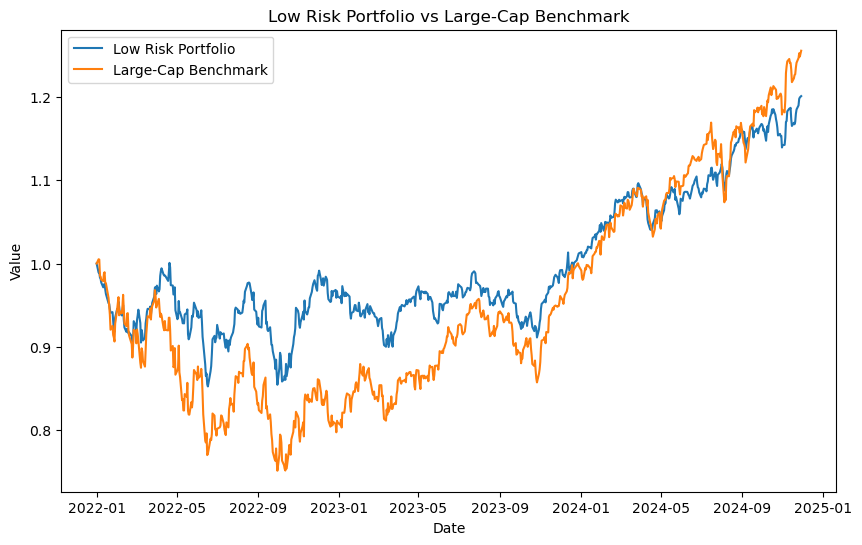

0.00023319031602833716
0.00016564582906803963


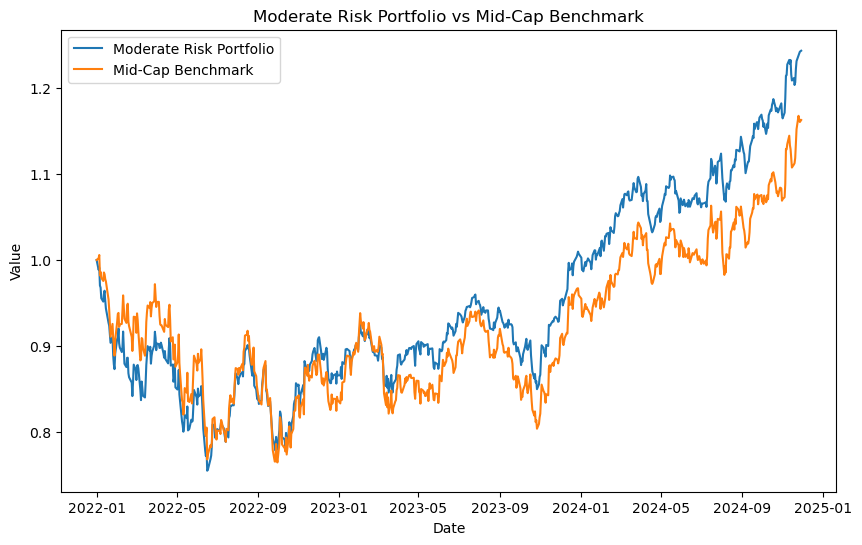

0.00032011482675914696
0.00012477846313499607


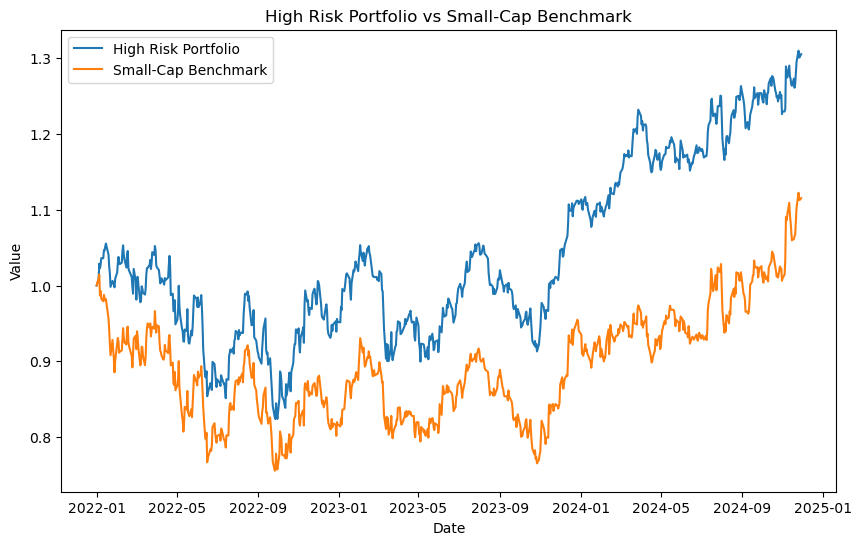

0.0010692285906202788
1.4731442976529539e-05


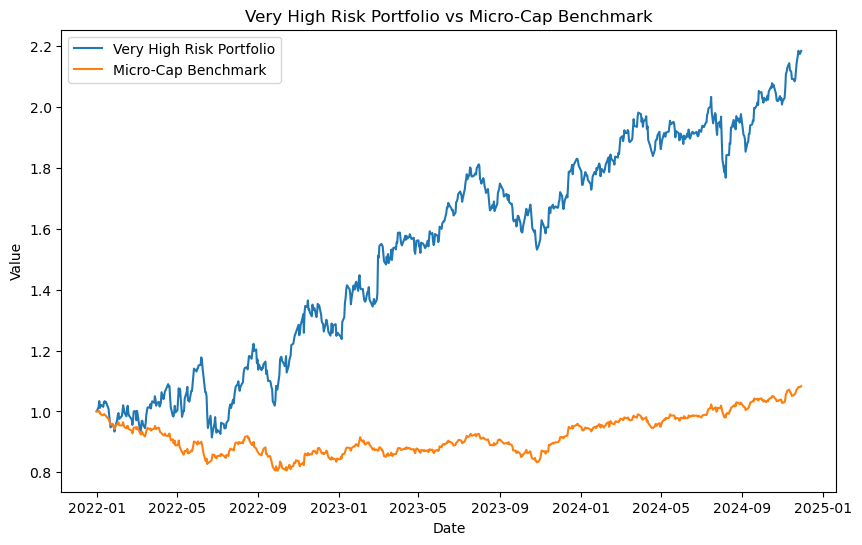

,Annualized Return,Sharpe Ratio,Sortino Ratio,Standard Deviation,Downside Deviation,Beta
Low Risk Portfolio,0.065024,0.324239,0.312354,0.126437,0.131247,0.545641
Large-Cap Benchmark,0.081405,0.364689,0.356642,0.173752,0.177673,0.986455
Moderate Risk Portfolio,0.077994,0.355465,0.347785,0.165316,0.168966,0.847688
Mid-Cap Benchmark,0.053373,0.209979,0.207454,0.198795,0.201214,1.024174
High Risk Portfolio,0.096,0.413583,0.425787,0.195049,0.189458,0.9218
Small-Cap Benchmark,0.03825,0.143634,0.146234,0.218918,0.215026,1.053749
Very High Risk Portfolio,0.308757,1.095859,1.090627,0.245876,0.247056,1.032314
Micro-Cap Benchmark,0.027869,0.033248,0.033441,0.111654,0.11101,0.584628


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
metrics = ["Annualized Return", "Sharpe Ratio", "Sortino Ratio", "Standard Deviation", "Downside Deviation", "Beta"]
# Function to calculate performance metrics for a time series
def calculate_metrics(daily_returns, benchmark_returns, risk_free_rate=0.03 / 252):
    # Ensure no missing values
    daily_returns = daily_returns.dropna()
    benchmark_returns = benchmark_returns.dropna()

    # Filter benchmark_returns to match daily_returns index
    benchmark_returns = benchmark_returns.loc[daily_returns.index]

    # Calculate cumulative return
    cumulative_return = (1 + daily_returns).prod() - 1

    # Calculate number of years (for annualized metrics)
    n_years = (daily_returns.index[-1] - daily_returns.index[0]).days / 365.25

    # Calculate annualized return
    annualized_return = (1 + cumulative_return) ** (1 / n_years) - 1

    # Excess returns for Sharpe and Sortino ratios
    excess_returns = daily_returns - risk_free_rate

    # Sharpe Ratio
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)

    # Sortino Ratio
    downside_returns = excess_returns[excess_returns < 0]
    downside_deviation = np.sqrt((downside_returns ** 2).mean()) * np.sqrt(252)
    sortino_ratio = excess_returns.mean() * 252 / downside_deviation
    print(excess_returns.mean())
    # Standard Deviation (Portfolio volatility)
    portfolio_std_dev = daily_returns.std() * np.sqrt(252)

    # Beta calculation (relative to benchmark)
    covariance = np.cov(daily_returns, benchmark_returns)[0, 1]
    benchmark_variance = benchmark_returns.var()
    beta = covariance / benchmark_variance
    return {
        "Annualized Return": annualized_return,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Standard Deviation": portfolio_std_dev,
        "Downside Deviation": downside_deviation,
        "Beta": beta
    }

# Assuming all_portfolio_values and benchmarks are loaded already
# Assuming all_portfolio_values has columns ['low', 'moderate', 'high', 'very_high']

# Create an empty DataFrame to store metrics
performance_metrics = pd.DataFrame(columns=metrics)

# Loop through each portfolio and corresponding benchmark
for portfolio_category, benchmark_category in zip(portfolio_categories, benchmarks_categories):
    # Get portfolio returns
    portfolio_returns = all_portfolio_values[portfolio_category].pct_change().dropna()

    # Get benchmark returns
    benchmark_returns = benchmarks[benchmark_category].pct_change().dropna()

    # Get SPY returns for beta calculation
    spy_returns = loaded_data['SPY']['Adj Close'].pct_change().dropna()

    # Align SPY returns with the portfolio returns
    spy_returns = spy_returns.loc[portfolio_returns.index]

    # Calculate the metrics for the portfolio
    portfolio_metrics = calculate_metrics(portfolio_returns, spy_returns)
    for metric in metrics:
        performance_metrics.loc[portfolio_category + ' Portfolio', metric] = portfolio_metrics[metric]
        
    benchmark_metrics = calculate_metrics(benchmark_returns, spy_returns)
    for metric in metrics:
        performance_metrics.loc[benchmark_category + " Benchmark", metric] = benchmark_metrics[metric]

    # Plot the portfolio and benchmark values on the same graph
    plt.figure(figsize=(10, 6))
    plt.plot(all_portfolio_values.index, all_portfolio_values[portfolio_category], label=f'{portfolio_category} Portfolio')
    plt.plot(benchmarks.index, benchmarks[benchmark_category], label=f'{benchmark_category} Benchmark')
    plt.title(f'{portfolio_category} Portfolio vs {benchmark_category} Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Output the performance metrics
performance_metrics
